# Lab: Dimension reduction (2)

In the previous lab, we learned how to work with dimension reduction in a relatively simple dataset. In this lab we are going to work with a much larger dataset: a subset of the US Census & Crime data [@misc_communities_and_crime_183]. Details about the various variables can be found [here](http://archive.ics.uci.edu/ml/datasets/communities+and+crime).

How can we tackle a dataset with 100 different dimensions? We try using PCA and clustering. There is a lot you can do with this dataset. We encourage you to dig in. Try and find some interesting patterns in the data. Even upload your findings to the Teams channel and discuss.

## Data

In [1]:
import pandas as pd
df = pd.read_csv('data/censusCrimeClean.csv')

df

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


## Principal Component Analysis

In [2]:
from sklearn.decomposition import PCA

n_components = 2
 
pca = PCA(n_components=n_components)
df_pca = pca.fit(df.iloc[:, 1:])

In [3]:
df_pca.explained_variance_

array([8.26130789, 1.08655844])

In [4]:
df_pca_vals = pca.fit_transform(df.iloc[:,1:])
df['c1'] = [item[0] for item in df_pca_vals]
df['c2'] = [item[1] for item in df_pca_vals]

<Axes: xlabel='c1', ylabel='c2'>

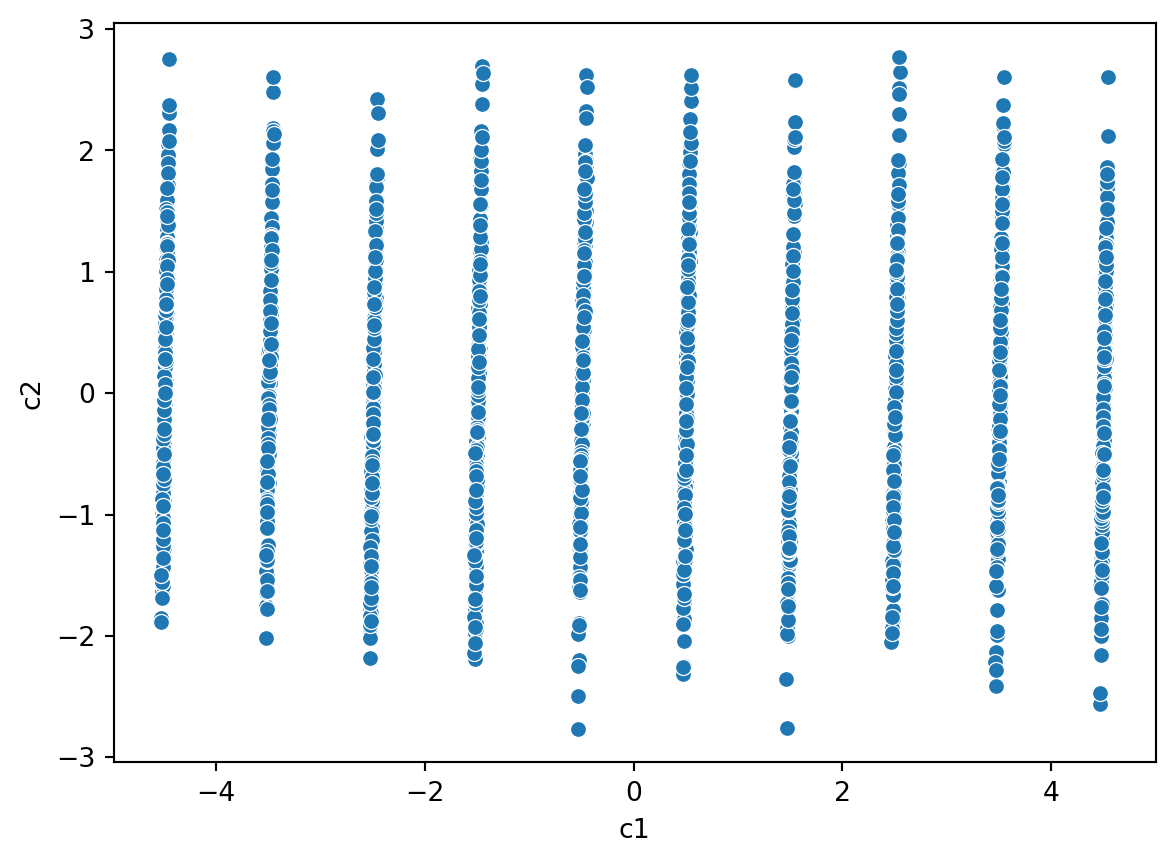

In [5]:
import seaborn as sns
sns.scatterplot(data = df, x = 'c1', y = 'c2')

Hmm, that looks problematic. What is going on?

We should look at the component loadings. Though there are going to be over 200 of them. We can put them into a Pandas dataframe and then sort them.

In [6]:
data = {'columns' : df.columns[1:102],
        'component 1' : df_pca.components_[0],
        'component 2' : df_pca.components_[1]}


loadings = pd.DataFrame(data)
loadings.sort_values(by=['component 1'], ascending=False) 

,columns,component 1,component 2
0,fold,0.999788,-0.016430
12,pctUrban,0.004944,0.146079
85,RentHighQ,0.004078,0.188187
13,medIncome,0.003932,0.185649
46,PctYoungKids2Par,0.003818,0.178675
...,...,...,...
17,pctWSocSec,-0.003353,-0.059245
29,PctPopUnderPov,-0.003594,-0.190548
18,pctWPubAsst,-0.003697,-0.173593
10,agePct65up,-0.003767,-0.033010


In [7]:
loadings.sort_values(by=['component 2'], ascending=False) 

,columns,component 1,component 2
85,RentHighQ,0.004078,0.188187
13,medIncome,0.003932,0.185649
46,PctYoungKids2Par,0.003818,0.178675
20,medFamInc,0.003025,0.177225
45,PctKids2Par,0.002385,0.169581
...,...,...,...
51,PctIlleg,-0.001022,-0.153504
31,PctNotHSGrad,-0.002967,-0.158646
18,pctWPubAsst,-0.003697,-0.173593
29,PctPopUnderPov,-0.003594,-0.190548


The fold variable is messing with our PCA. What does that variable look like.

In [8]:
df.fold.value_counts()

fold
1     200
2     200
3     200
4     200
5     199
6     199
7     199
8     199
9     199
10    199
Name: count, dtype: int64

In [9]:
df['fold'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Aha! It looks to be some sort of categorical variable. Looking into the dataset more, it is actually a variable used for cross tabling.

We should not include this variable in our analysis.

In [10]:
df.iloc[:, 2:-2]

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


<Axes: xlabel='c1_no_fold', ylabel='c2_no_fold'>

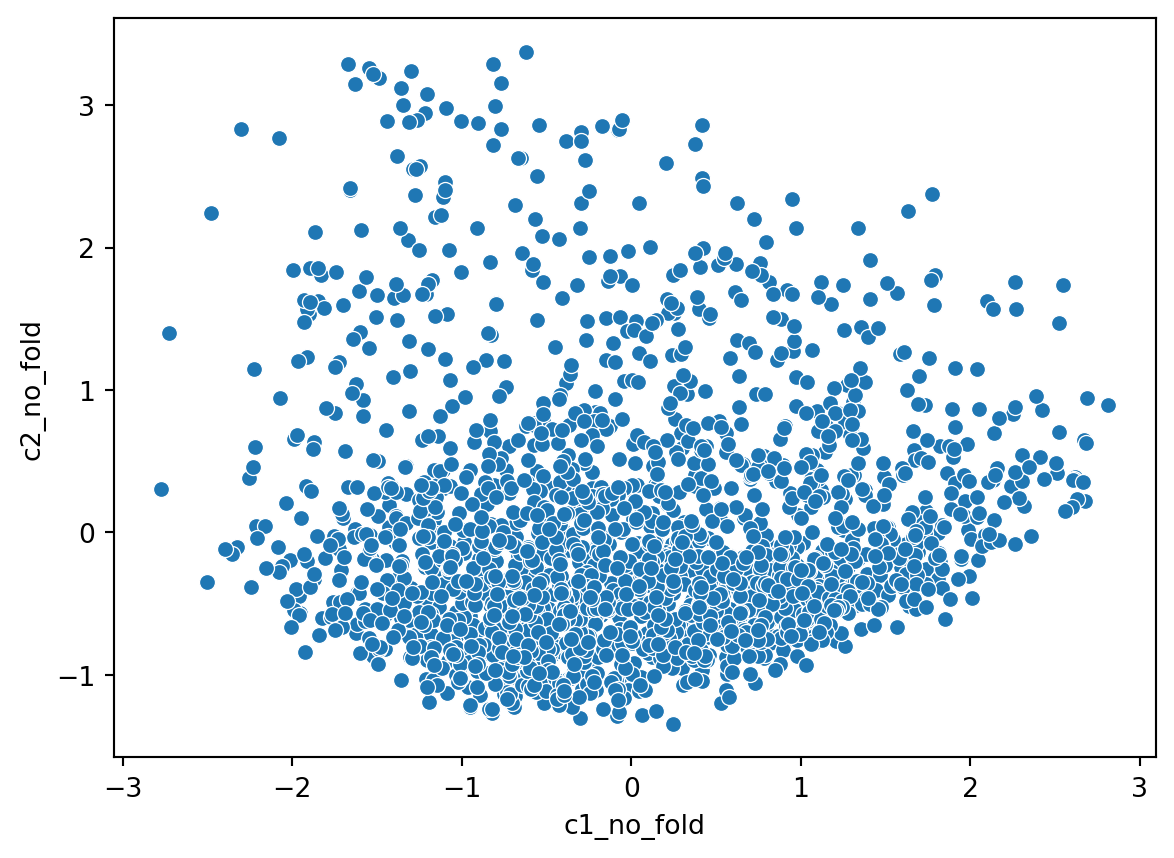

In [11]:
from sklearn.decomposition import PCA

n_components = 2

pca_no_fold = PCA(n_components=n_components)
df_pca_no_fold = pca_no_fold.fit(df.iloc[:, 2:-2])

df_pca_vals = pca_no_fold.fit_transform(df.iloc[:, 2:-2])

df['c1_no_fold'] = [item[0] for item in df_pca_vals]
df['c2_no_fold'] = [item[1] for item in df_pca_vals]

sns.scatterplot(data = df, x = 'c1_no_fold', y = 'c2_no_fold')

How do our component loadings look?

In [12]:
data = {'columns' : df.iloc[:, 2:-4].columns,
        'component 1' : df_pca_no_fold.components_[0],
        'component 2' : df_pca_no_fold.components_[1]}


loadings = pd.DataFrame(data)
loadings_sorted = loadings.sort_values(by=['component 1'], ascending=False)
loadings_sorted.iloc[1:10,:]

,columns,component 1,component 2
12,medIncome,0.185822,0.040774
45,PctYoungKids2Par,0.178807,-0.017237
19,medFamInc,0.177283,0.031895
44,PctKids2Par,0.169533,-0.042621
43,PctFam2Par,0.163277,-0.031094
82,RentLowQ,0.163120,0.119274
85,MedRent,0.163120,0.106135
80,OwnOccMedVal,0.159850,0.135830
83,RentMedian,0.159605,0.113360


In [13]:
loadings_sorted = loadings.sort_values(by=['component 2'], ascending=False)
loadings_sorted.iloc[1:10,:]

,columns,component 1,component 2
59,PctRecImmig10,-0.000556,0.253476
57,PctRecImmig5,-0.000901,0.252463
56,PctRecentImmig,0.001797,0.248239
91,PctForeignBorn,0.024743,0.241783
61,PctNotSpeakEnglWell,-0.048595,0.207575
5,racePctHisp,-0.063868,0.187826
68,PctPersDenseHous,-0.087193,0.184704
11,pctUrban,0.146557,0.183317
4,racePctAsian,0.061547,0.160710


Interesting that our first component variables are income related whereas our second component variables are immigration related. If we look at the projections of the model, coloured by Crime, what do we see?

<Axes: xlabel='c1_no_fold', ylabel='c2_no_fold'>

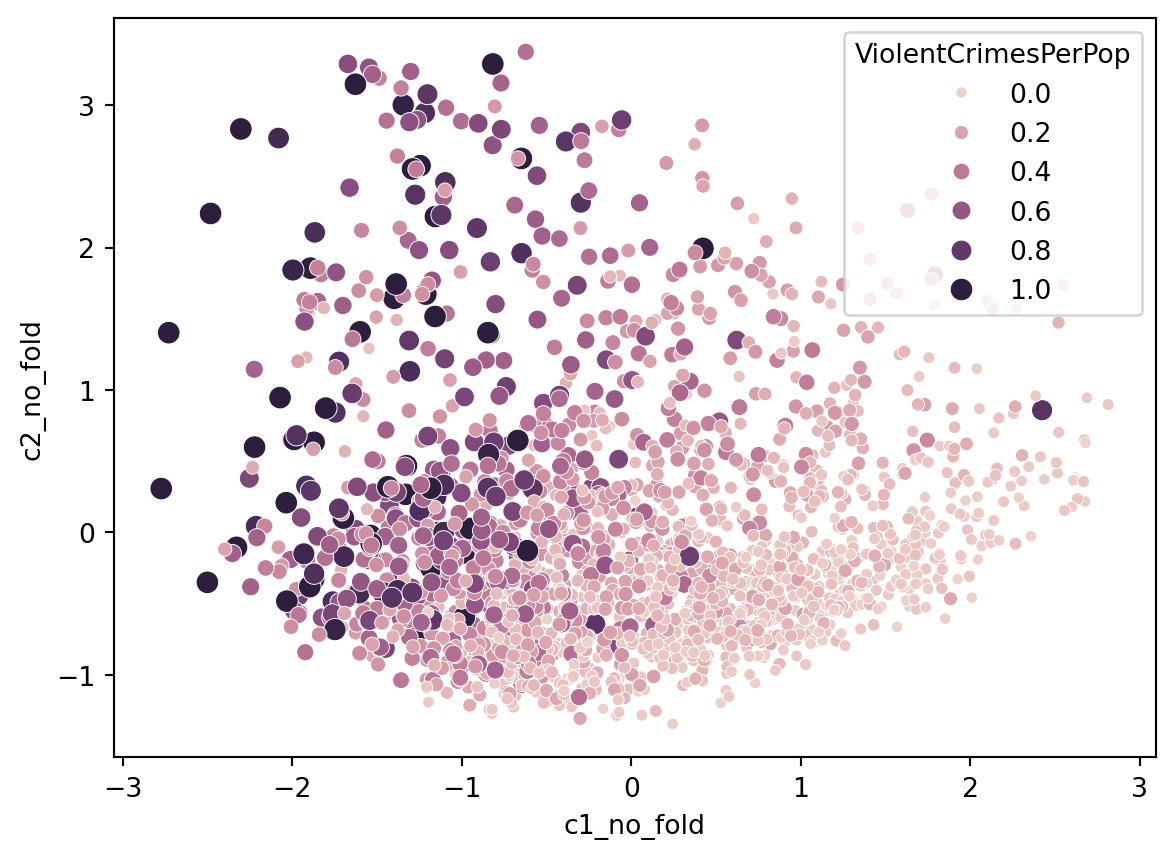

In [14]:
sns.scatterplot(data = df,
                x = 'c1_no_fold',
                y = 'c2_no_fold',
                hue = 'ViolentCrimesPerPop',
                size = 'ViolentCrimesPerPop')

## Clustering

What about clustering using these `income` and `immigration` components?

### Defining number of clusters

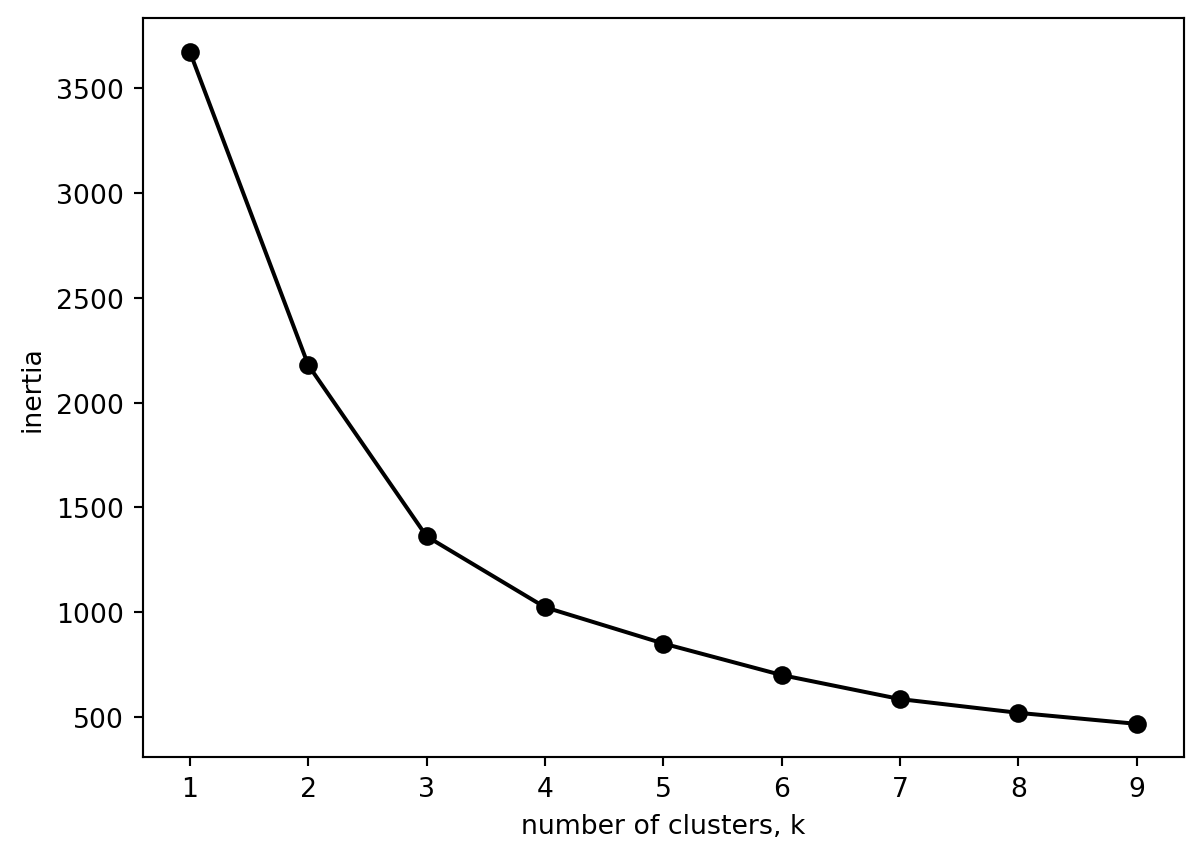

In [15]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init = 10)
    
    # Fit model to samples
    model.fit(df[['c1_no_fold', 'c2_no_fold']])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

import matplotlib.pyplot as plt

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Four clusters looks good.

## Visualising clusters

In [16]:
k_means_4 = KMeans(n_clusters = 3, init = 'random', n_init = 10)
k_means_4.fit(df[['c1_no_fold', 'c2_no_fold']])
df['Four clusters'] = pd.Series(k_means_4.predict(df[['c1_no_fold', 'c2_no_fold']].values), index = df.index)

/Users/u2071219/anaconda3/envs/IM939/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


<Axes: xlabel='c1_no_fold', ylabel='c2_no_fold'>

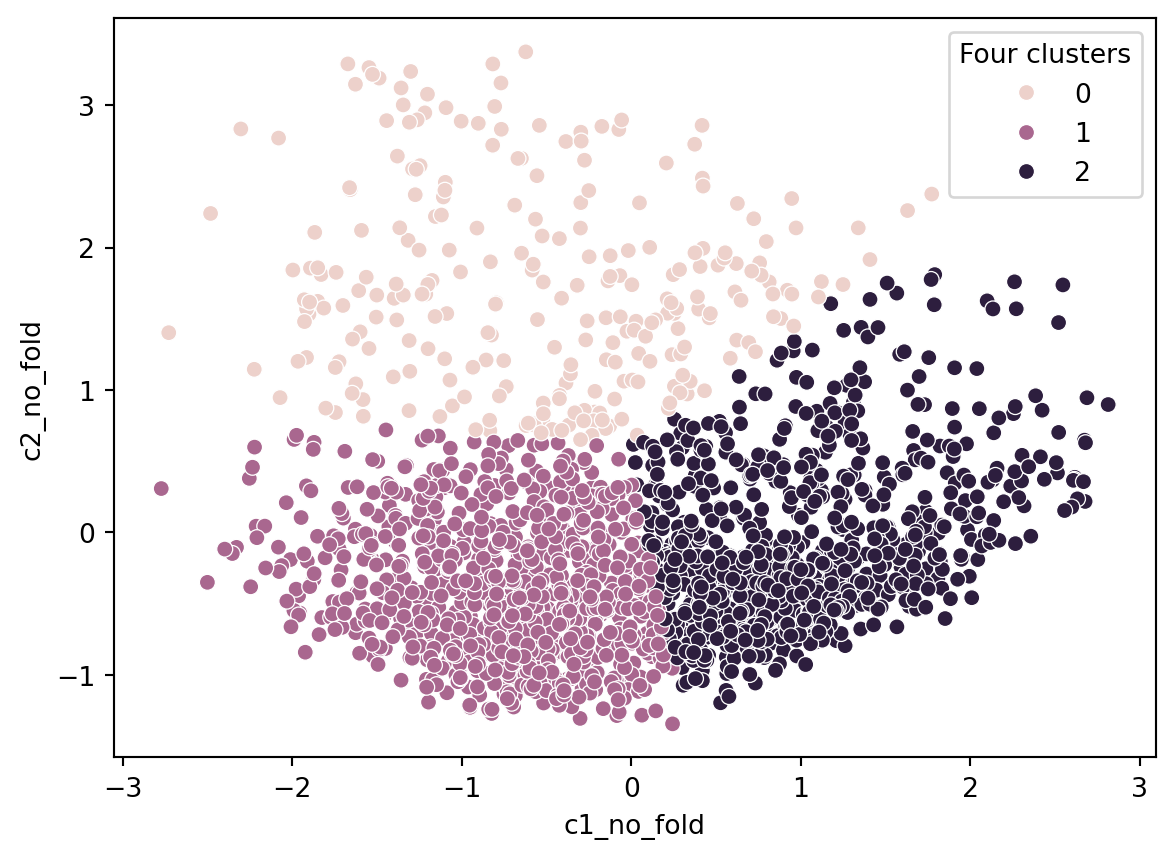

In [17]:
sns.scatterplot(data = df, x = 'c1_no_fold', y = 'c2_no_fold', hue = 'Four clusters')

Hmm, might we interpret this plot? The plot is unclear. Let us assume c1 is an income component and c2 is an immigration component. Cluster 0 are places high on income and low on immigration. Cluster 2 are low on income and low on immigration. The interesting group are those high on immigration and relatively low on income.

We can include crime on the plot.

<Axes: xlabel='c1_no_fold', ylabel='c2_no_fold'>

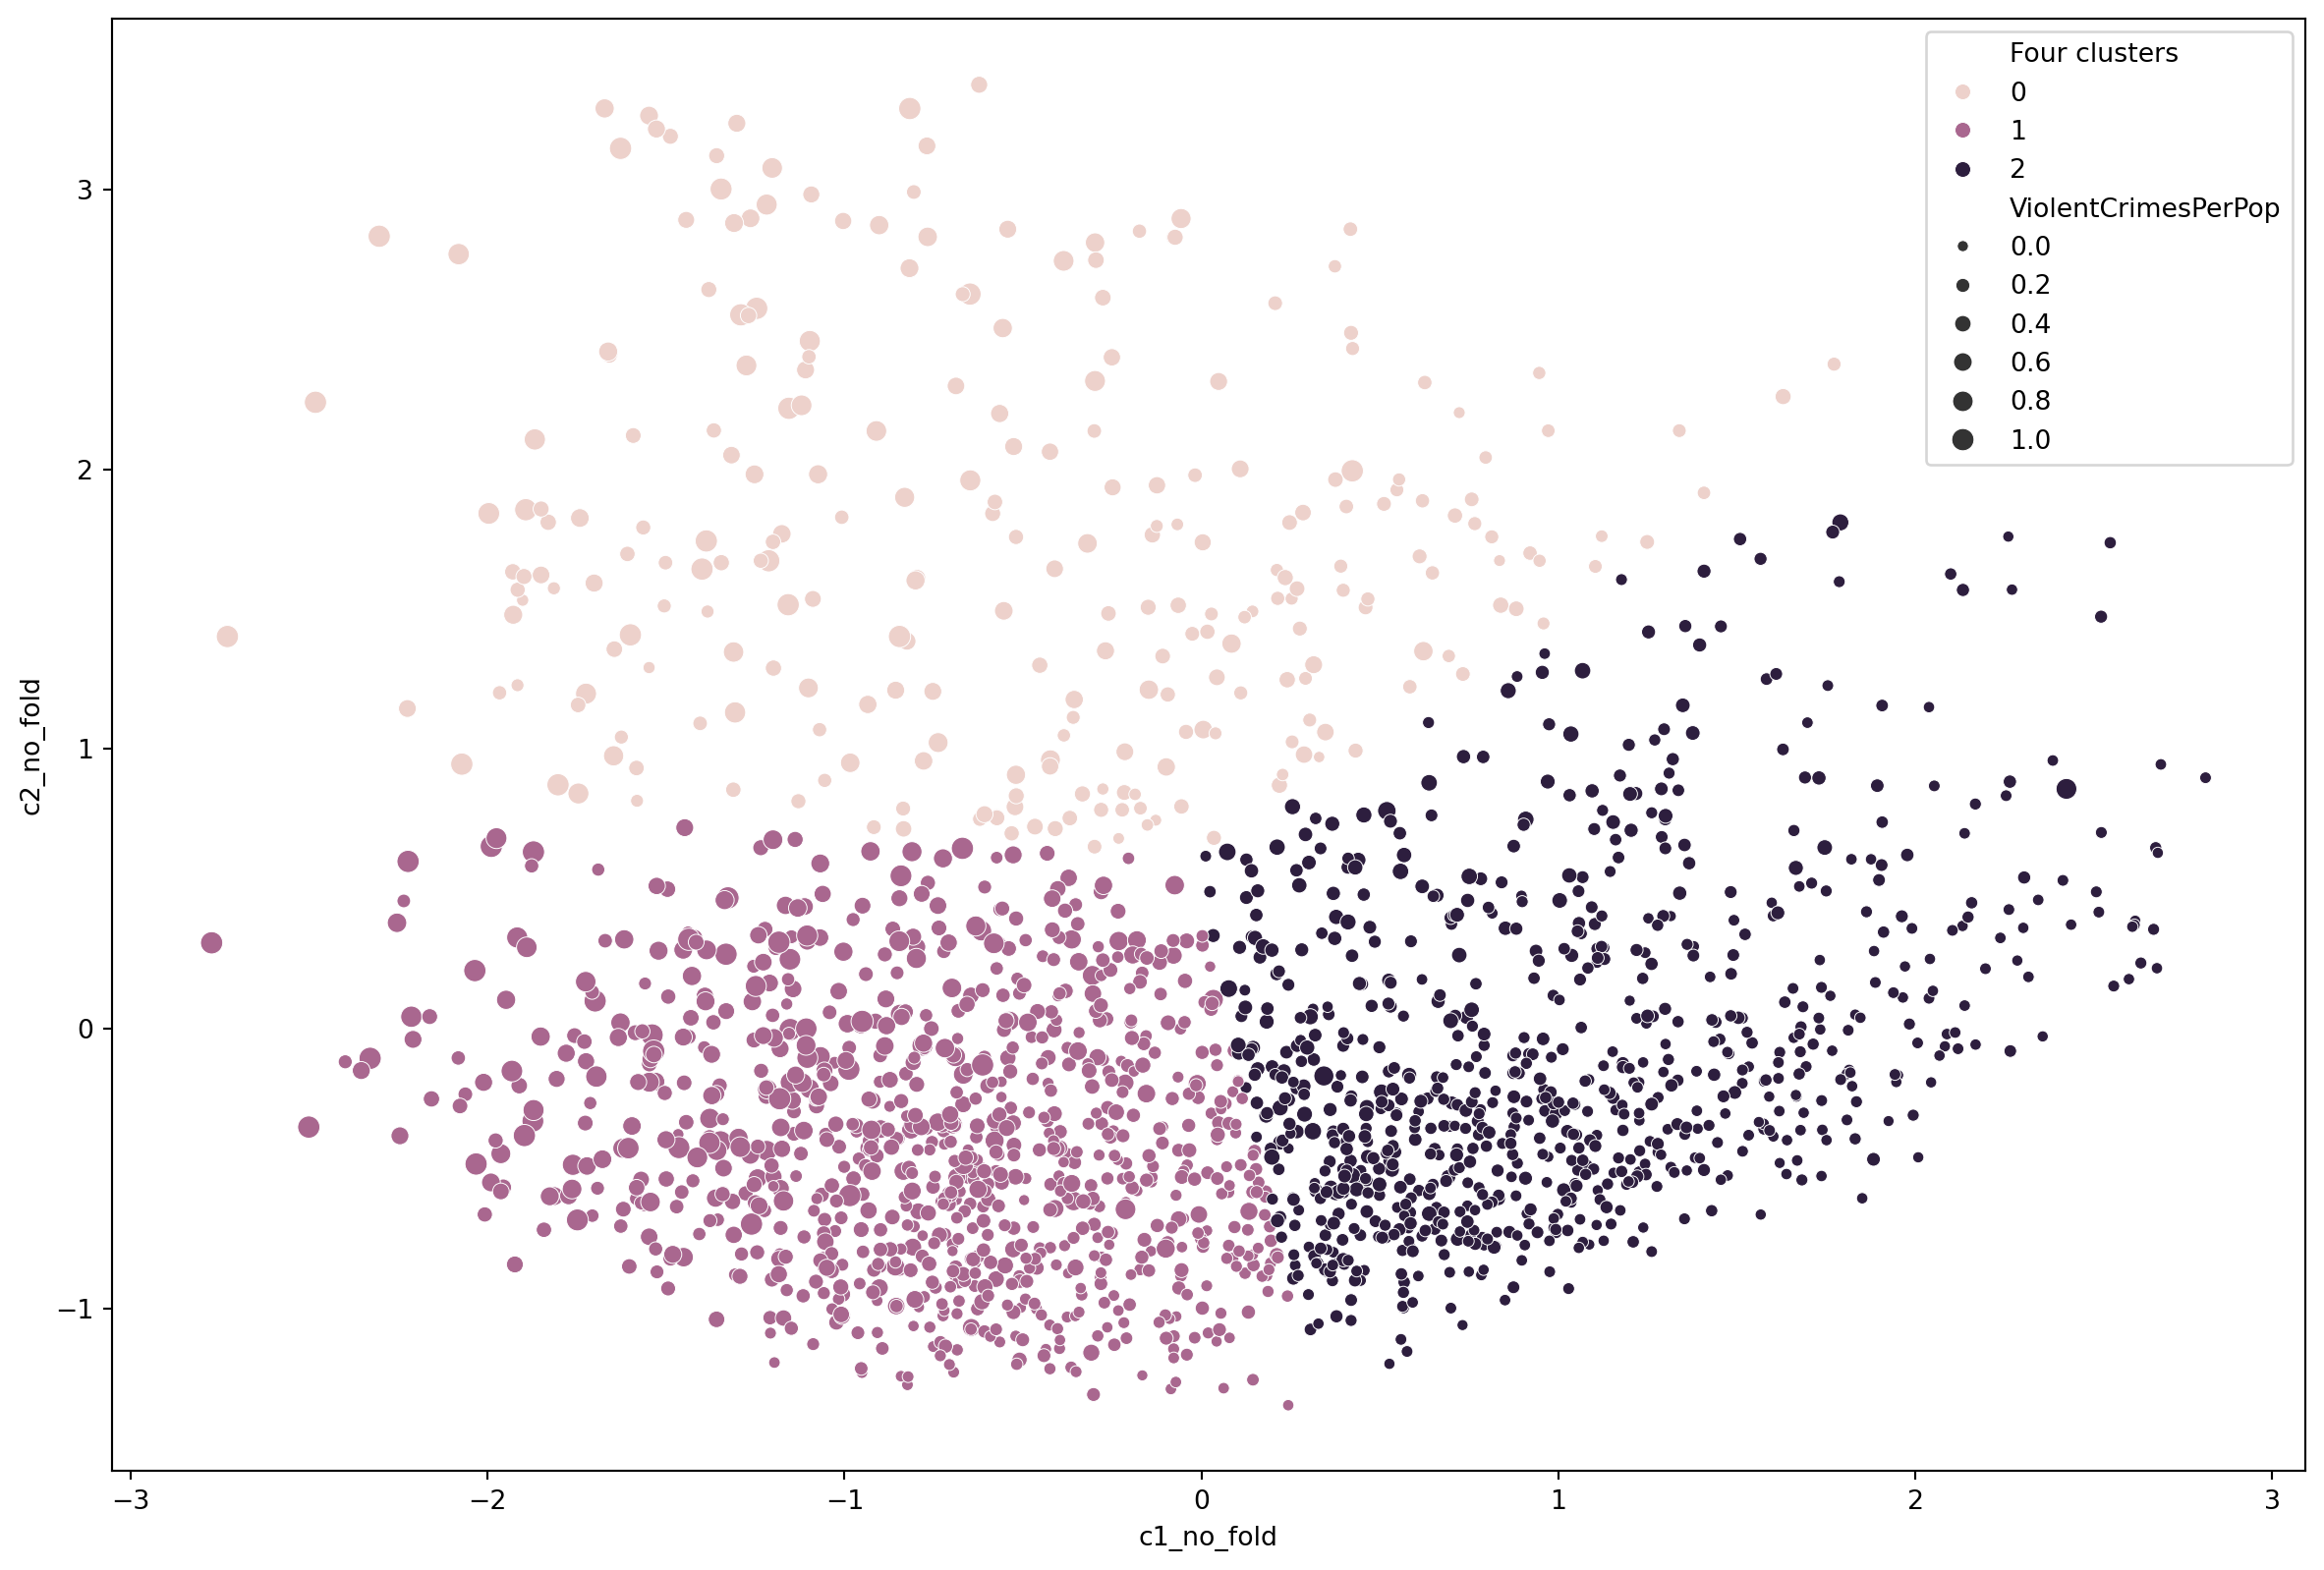

In [18]:
#| column: screen

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
sns.scatterplot(data = df, x = 'c1_no_fold', y = 'c2_no_fold', hue = 'Four clusters', size = 'ViolentCrimesPerPop')

Alas, we stop here in this exercise. You could work on this further. There are outliers you might want to remove. Or, at this stage, you might want to look at more components, 3 or 4 and look for some other factors.